In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from transformers import pipeline

df = pd.read_csv('data/generated4_gpt4b_clean_octo_pair_id.csv')

classifier = pipeline("text-classification", model="Hello-SimpleAI/chatgpt-detector-roberta", truncation=True)

prediction_list = []
for idx, row in df.iterrows():
    labels_real = classifier(row['real_answer'])
    labels_generated = classifier(row['generated_answer'])
    
    assert len(labels_real) == 1
    assert len(labels_generated) == 1

    new_row = row.copy()
    new_row['real_answer_detection_label'] = labels_real[0]['label']
    new_row['real_answer_detection_score'] = labels_real[0]['score']

    new_row['generated_answer_detection_label'] = labels_generated[0]['label']
    new_row['generated_answer_detection_score'] = labels_generated[0]['score']

    prediction_list.append(new_row)

predictions = pd.DataFrame(prediction_list)
predictions.to_csv('fake_news_labels2.csv', index=False)

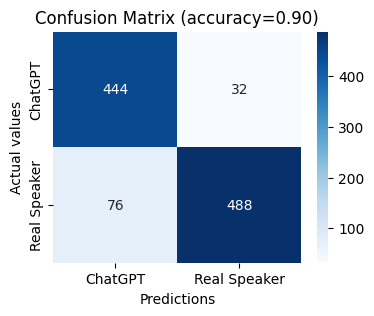

In [52]:
# positive: ai, negative: human
tp = sum(predictions['generated_answer_detection_label']=='ChatGPT')
fn = sum(predictions['generated_answer_detection_label']=='Human')
tn = sum(predictions['real_answer_detection_label']=='Human')
fp = sum(predictions['real_answer_detection_label']=='ChatGPT')

accuracy = (tp + tn) / (tp + tn + fp + fn)

plt.figure(figsize=(4, 3))
confusion_df = pd.DataFrame([[tp, fp], [fn, tn]], index=['ChatGPT', 'Real Speaker'], columns=['ChatGPT', 'Real Speaker'])
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix (accuracy={accuracy:.2f})')
plt.savefig('figures/confusion_matrix.pdf')
plt.show()